<a href="https://colab.research.google.com/github/solomonkimunyu/Machine-learning/blob/master/KNN_and_Logistic_on_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [3]:
iris = load_iris()

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
#iris.data

In [10]:
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [12]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
iris_df['Species'] = iris.target

In [14]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [16]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [17]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


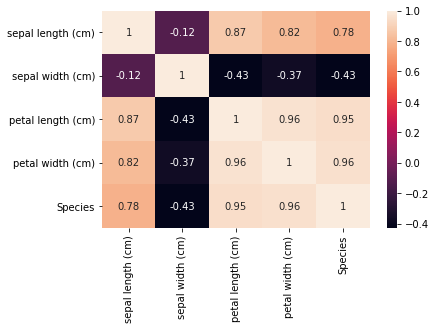

In [18]:
sns.heatmap(iris_df.corr(), annot=True)

In [19]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


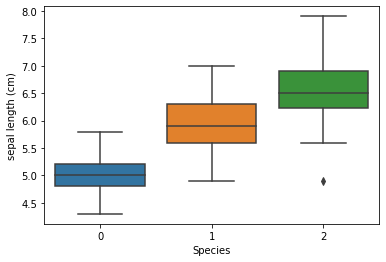

In [20]:
sns.boxplot( 'Species','sepal length (cm)',data=iris_df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


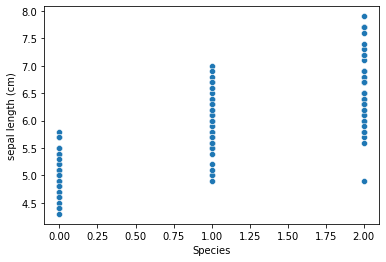

In [21]:
sns.scatterplot( 'Species','sepal length (cm)',data=iris_df)

In [24]:
sns.scatterplot?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


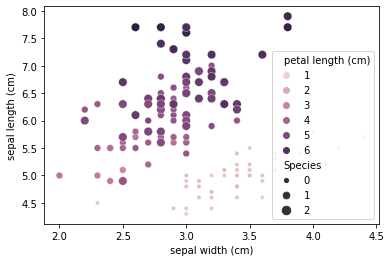

In [26]:
sns.scatterplot( 'sepal width (cm)','sepal length (cm)',hue='petal length (cm)',size='Species',data=iris_df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


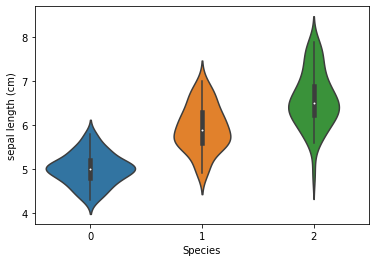

In [30]:
sns.violinplot( 'Species','sepal length (cm)',data=iris_df)

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [32]:
model = LogisticRegression()

In [105]:
model.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [106]:
model?

In [33]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

In [34]:
X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]

In [36]:
y = iris_df['Species']

In [37]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [38]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=333)

In [92]:
X_train.shape

(135, 4)

In [93]:
X_test.shape

(15, 4)

In [94]:
y_test.shape

(15,)

In [95]:
y_train.shape

(135,)

In [96]:
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
pred = model.predict(X_test)

In [98]:
pred

array([2, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 1, 1])

In [99]:
df = pd.DataFrame(y_test)

In [100]:
df['predictions'] = pred

In [101]:
df

,Species,predictions
77,1,2
46,0,0
37,0,0
13,0,0
113,2,2
36,0,0
27,0,0
135,2,2
117,2,2
53,1,1


In [102]:
y_train_pred = model.predict(X_train)

In [103]:
accuracy_score(y_train,y_train_pred )

0.9777777777777777

In [104]:
accuracy_score(y_test, pred)

0.9333333333333333

In [85]:
cm = confusion_matrix(y_test, pred)

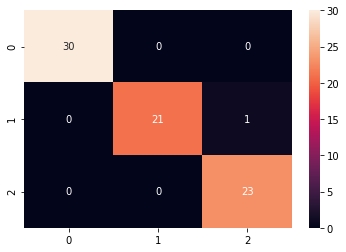

In [86]:
sns.heatmap(cm, annot=True)

In [87]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      0.95      0.98        22
           2       0.96      1.00      0.98        23

    accuracy                           0.99        75
   macro avg       0.99      0.98      0.99        75
weighted avg       0.99      0.99      0.99        75



# KNN

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
KNeighborsClassifier?

In [168]:
knn = KNeighborsClassifier(n_neighbors=2,metric='minkowski')

In [169]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [170]:
knn_pred = knn.predict(X_test)

In [171]:
comparison = pd.DataFrame(y_test)

In [172]:
comparison['KNN'] = knn_pred

In [173]:
comparison

,Species,KNN
38,0,0
70,1,2
41,0,0
43,0,0
33,0,0
...,...,...
47,0,0
112,2,2
81,1,1
23,0,0


In [174]:
accuracy_score(y_test, knn_pred)

0.9333333333333333

In [166]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.90      0.88      0.89        41
           2       0.87      0.89      0.88        37

    accuracy                           0.93       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.93      0.93      0.93       120



In [167]:
cm = confusion_matrix(y_test, knn_pred)

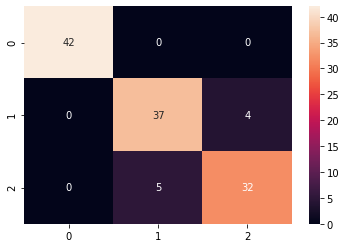

In [158]:
sns.heatmap(cm, annot=True)

In [175]:
from sklearn.model_selection import GridSearchCV

In [179]:
score = []
for k in range(1,30,1):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test,pred)
  score.append({k, accuracy})

In [180]:
score

[{0.9416666666666667, 1},
 {0.9333333333333333, 2},
 {0.925, 3},
 {0.925, 4},
 {0.925, 5},
 {0.9416666666666667, 6},
 {0.95, 7},
 {0.95, 8},
 {0.925, 9},
 {0.925, 10},
 {0.925, 11},
 {0.9166666666666666, 12},
 {0.9166666666666666, 13},
 {0.9166666666666666, 14},
 {0.9, 15},
 {0.9166666666666666, 16},
 {0.8166666666666667, 17},
 {0.6333333333333333, 18},
 {0.36666666666666664, 19},
 {0.36666666666666664, 20},
 {0.35833333333333334, 21},
 {0.35833333333333334, 22},
 {0.35, 23},
 {0.35, 24},
 {0.3416666666666667, 25},
 {0.3416666666666667, 26},
 {0.30833333333333335, 27},
 {0.30833333333333335, 28},
 {0.30833333333333335, 29}]